### weather hourly bostons data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
#import datetime
from datetime import date, time, datetime, timedelta

In [18]:
weather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0
3,2015-01-02 04:00:00,-0.6,-0.6,0.0
4,2015-01-02 05:00:00,-0.6,-0.6,0.0


In [27]:
weather = pd.read_csv("weather_hourly_boston.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


### Null values, handling needed

In [3]:
### nb. of rows with null
weather.isna().sum()

date_time    494
max_temp     494
min_temp     494
precip       492
dtype: int64

##### Get intuition when NULL values appear and whether there are enough values around them

In [20]:
missing_value_index = [] #creating new list with no values
NaNFrame = weather.isna() #getting DataFrame containing TRUE if NaN is given
num_rows, num_cols = NaNFrame.values.shape #shape returns two values
boolean_switch = False 
z = 0

for i in range(0,num_rows):
    for j in range(0,num_cols):
        if NaNFrame.values[i][j]: 
            boolean_switch = True #boolean_switch is set to True if at least one column found, which contains NaN
     
    # if at the end of the loop boolean_switch is true, add this position and the row before and afterwards to the list
    if boolean_switch:
        missing_value_index.append(z-1) 
        missing_value_index.append(z)
        missing_value_index.append(z+1)
        
    # prepare for next loop
    z += 1
    boolean_switch = False
            
            
# Display all rows for which we have found that at least one value is absent
weather.loc[missing_value_index]


,date_time,max_temp,min_temp,precip
97,2015-01-06 02:00:00,-6.7,-6.7,0.0
98,NaN,NaN,NaN,NaN
99,2015-01-06 04:00:00,-7.8,-7.8,0.0
144,2015-01-08 01:00:00,-11.1,-11.1,0.0
145,NaN,NaN,NaN,NaN
...,...,...,...,...
43594,NaN,NaN,NaN,NaN
43595,2019-12-22 12:00:00,-0.6,-0.6,0.0
43668,2019-12-25 13:00:00,0.6,0.6,0.0
43669,NaN,NaN,NaN,NaN


As we can see, most of the times every NaN is surrounded by valid values. As during one hour the temperature should not change dramatically, we can use forward fill.

In [4]:
### remove null
weather.dropna(inplace = True)

In [38]:
weather.fillna(method="ffill", inplace = True)

In [39]:
### weather date_time change Dtype from object to date_time
weather["date_time"] = pd.to_datetime(weather["date_time"])

In [40]:
### begin of 2016
dateY1 = datetime(year=2016, month=1, day=1, hour=0, minute= 0, second=0, microsecond=0)
print(dateY1)

2016-01-01 00:00:00


In [41]:
### end of 2016
dateY2 = datetime(year=2016, month=12, day=31, hour=23, minute= 59, second=59, microsecond=0)
print(dateY2)

2016-12-31 23:59:59


In [42]:
## only weather data from 2016
weather2016 = weather[(weather["date_time"] >= dateY1) & (weather["date_time"] <= dateY2)]
weather2016.reset_index(drop = True, inplace = True)
weather2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8784 non-null   datetime64[ns]
 1   max_temp   8784 non-null   float64       
 2   min_temp   8784 non-null   float64       
 3   precip     8784 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 274.6 KB


In [43]:
weather2016.isna().sum()

date_time    0
max_temp     0
min_temp     0
precip       0
dtype: int64

a year has 8760 hours, the data set has 8690 hours (approx. 99,2 %)

In [45]:
### add date, month, hour
weather2016["date"] = weather2016["date_time"].dt.date
weather2016["date"] = pd.to_datetime(weather2016["date"])
weather2016["month"] = weather2016["date_time"].dt.month
#weather2016["week"] = weather2016["date_time"].dt.isocalendar().week
#weather2016["weekday"] = weather2016["date_time"].dt.weekday
weather2016["hour"] = weather2016["date_time"].dt.hour

### SettingWithCopyWarning

<ipython-input-45-f1af333cc77b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather2016["date"] = weather2016["date_time"].dt.date
<ipython-input-45-f1af333cc77b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather2016["date"] = pd.to_datetime(weather2016["date"])
<ipython-input-45-f1af333cc77b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [46]:
weather2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8784 non-null   datetime64[ns]
 1   max_temp   8784 non-null   float64       
 2   min_temp   8784 non-null   float64       
 3   precip     8784 non-null   float64       
 4   date       8784 non-null   datetime64[ns]
 5   month      8784 non-null   int64         
 6   weekday    8784 non-null   int64         
 7   hour       8784 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 549.1 KB


In [47]:
### weather 2016 max_temp max
weather2016["max_temp"].max()

36.1

In [50]:
weather2016.describe()

,max_temp,min_temp,precip,month,weekday,hour
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.737306,11.684210,0.080715,6.512637,3.007969,11.509904
std,9.794149,9.795362,0.272412,3.451467,1.997991,6.920172
min,-22.800000,-22.800000,0.000000,1.000000,0.000000,0.000000
25%,4.400000,4.400000,0.000000,4.000000,1.000000,6.000000
50%,11.700000,11.700000,0.000000,7.000000,3.000000,11.000000
75%,19.400000,19.400000,0.000000,10.000000,5.000000,18.000000
max,36.100000,36.100000,1.000000,12.000000,6.000000,23.000000


In [13]:
### weather 2016 min_temp max
weather2016["min_temp"].max()

36.1

In [14]:
### weather 2016 max_temp min
weather2016["max_temp"].min()

-22.8

In [15]:
### weather 2016 min_temp min
weather2016["min_temp"].min()

-22.8

In [16]:
### weather 2016 max_temp mean
weather2016["max_temp"].mean()

11.736352128883755

In [17]:
### weather 2016 min_temp mean
weather2016["min_temp"].mean()

11.683314154200225

In [18]:
### nb. of hours with max_temp > min_temp
len(weather2016.loc[weather2016.max_temp > weather2016.min_temp])

564

In [19]:
### nb. of hours with max_temp < min_temp
len(weather2016.loc[weather2016.max_temp < weather2016.min_temp])

0

In [21]:
### nb. of hours with weather preciptions, like snow or rainfall 
len(weather2016.loc[weather2016.precip == 1])

703

In [22]:
### nb. of hours without weather preciptions
len(weather2016.loc[weather2016.precip == 0])

7987

In [25]:
weather2016["precip"].value_counts()

0.0    7987
1.0     703
Name: precip, dtype: int64

In [12]:
# max min ist nicht immer gleich, nehme median?
weather[weather["max_temp"] != weather["min_temp"]].count()

date_time    3167
max_temp     3167
min_temp     3167
precip       3169
dtype: int64

### plot weather data

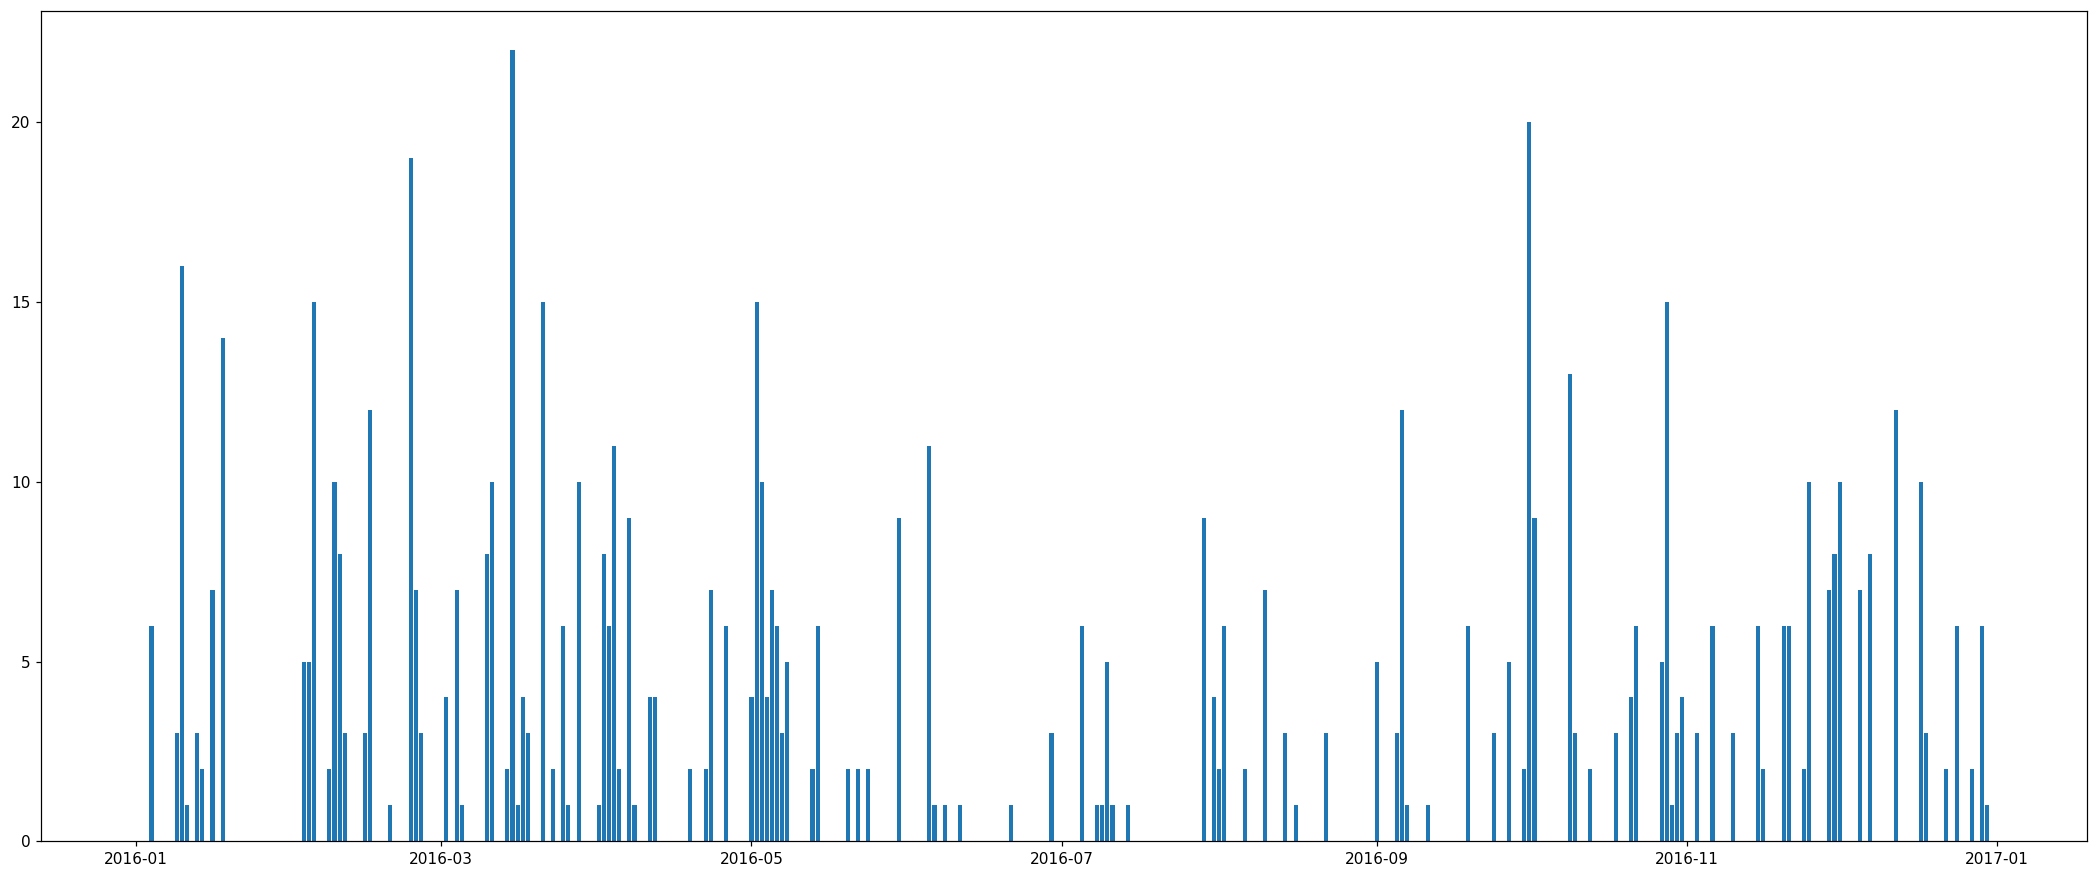

In [23]:
### hours with precip
weather16 = weather2016.groupby(["date"])["precip"].sum()

fig,ax = plt.subplots(figsize=(24,10), dpi=110) 

ax.bar(weather16.index, weather16)

plt.show()

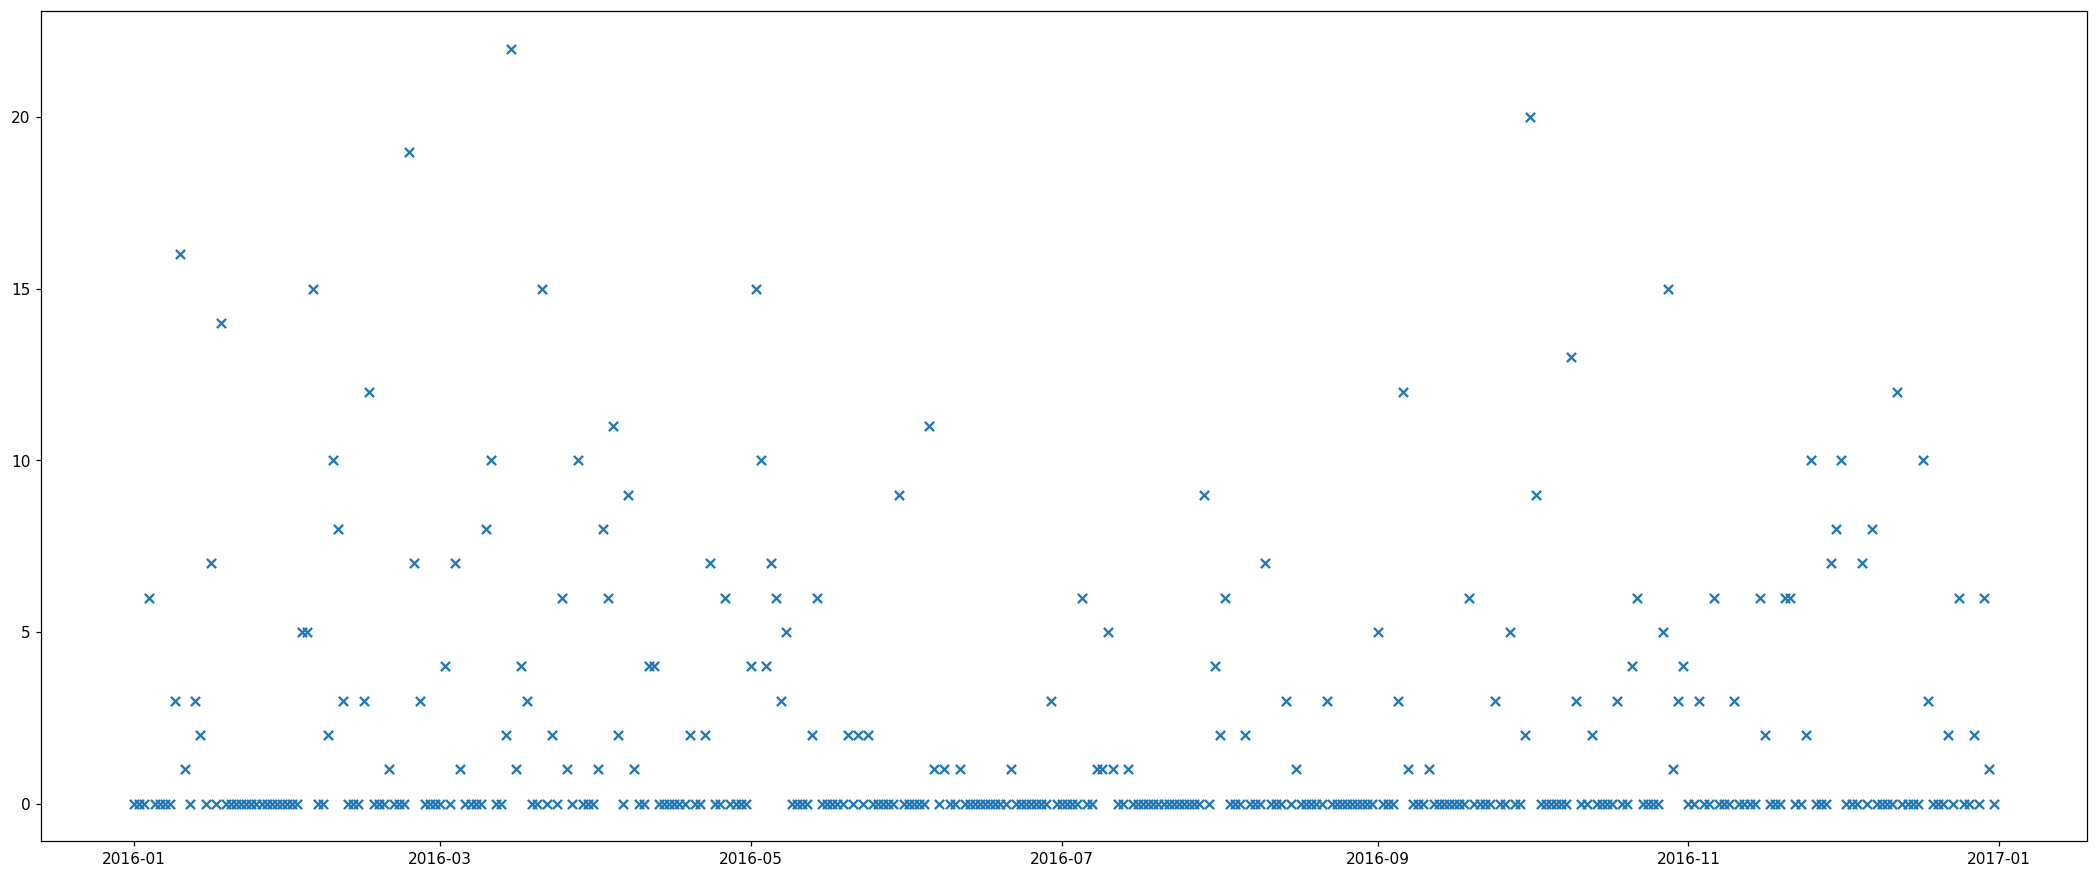

In [26]:
### hours with precip as scatter
weather16 = weather2016.groupby(["date"])["precip"].sum()

fig,ax = plt.subplots(figsize=(24,10), dpi=110) 

ax.scatter(weather16.index, weather16, marker="x")

plt.show()

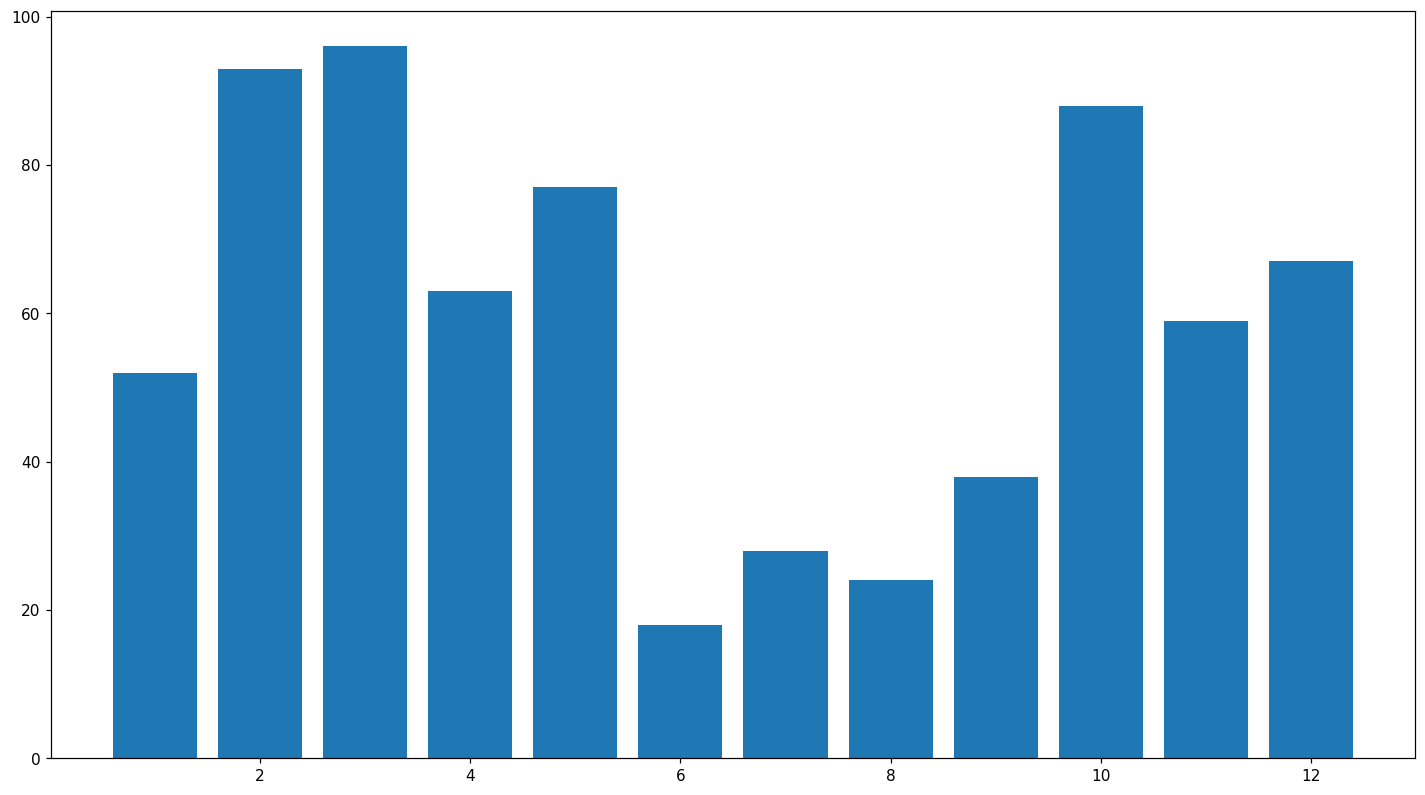

In [27]:
### hours with precip per month
weather16 = weather2016.groupby(["month"])["precip"].sum()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(weather16.index, weather16)

plt.show()

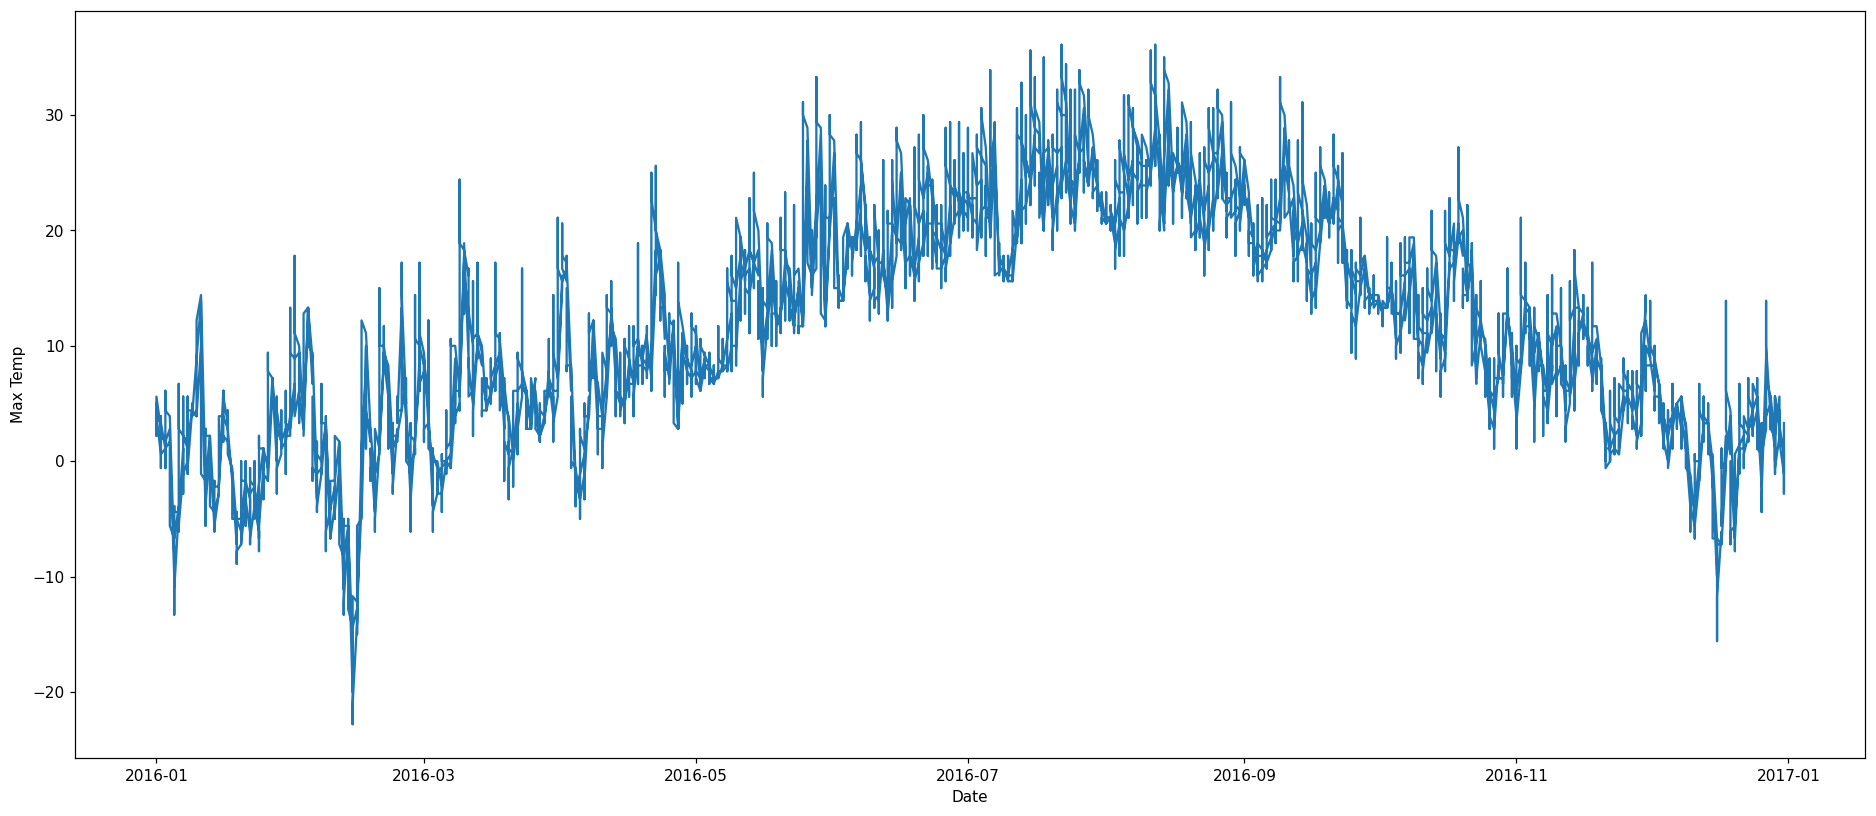

In [32]:
### max temp 
fig, ax = plt.subplots(figsize = (21,9), dpi=110)

# Plotting the data
ax.plot(weather2016["date"],weather2016["max_temp"])
ax.set_xlabel("Date")
ax.set_ylabel("Max Temp")
plt.show()

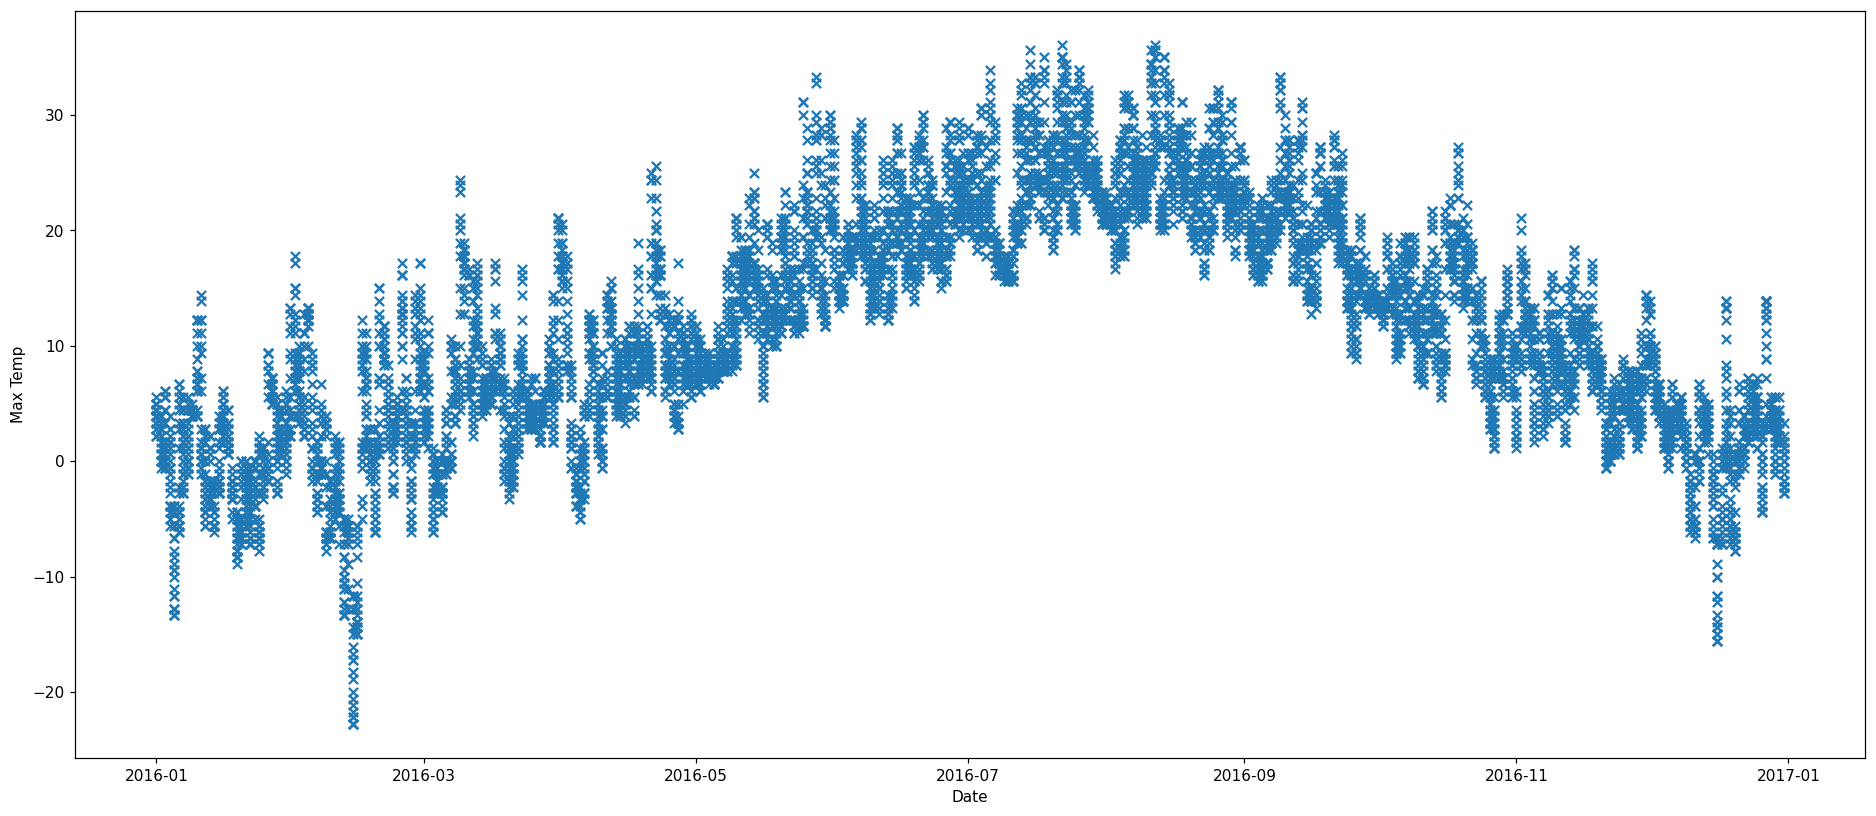

In [31]:
### max temp scatter
fig, ax = plt.subplots(figsize = (21,9), dpi=110)

# Plotting the data
ax.scatter(weather2016["date"],weather2016["max_temp"], marker="x")
ax.set_xlabel("Date")
ax.set_ylabel("Max Temp")
plt.show()

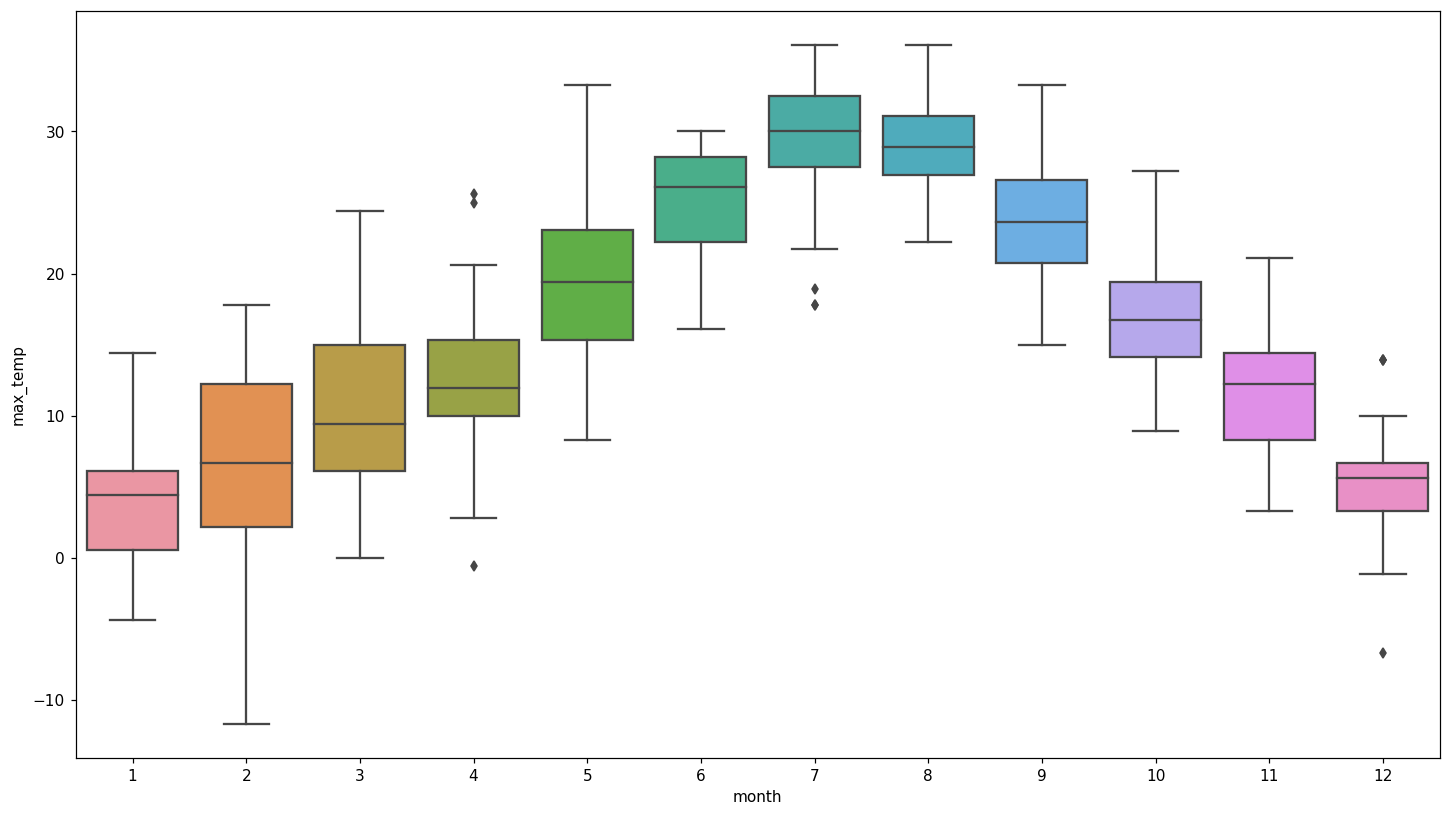

In [34]:
### monthly max temp
weather16_temp = weather2016.groupby(["date", "month"])["max_temp"].max()
weather16_temp = pd.DataFrame(weather16_temp)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=weather16_temp.index.get_level_values(1), y=weather16_temp["max_temp"],ax=ax)
plt.show()

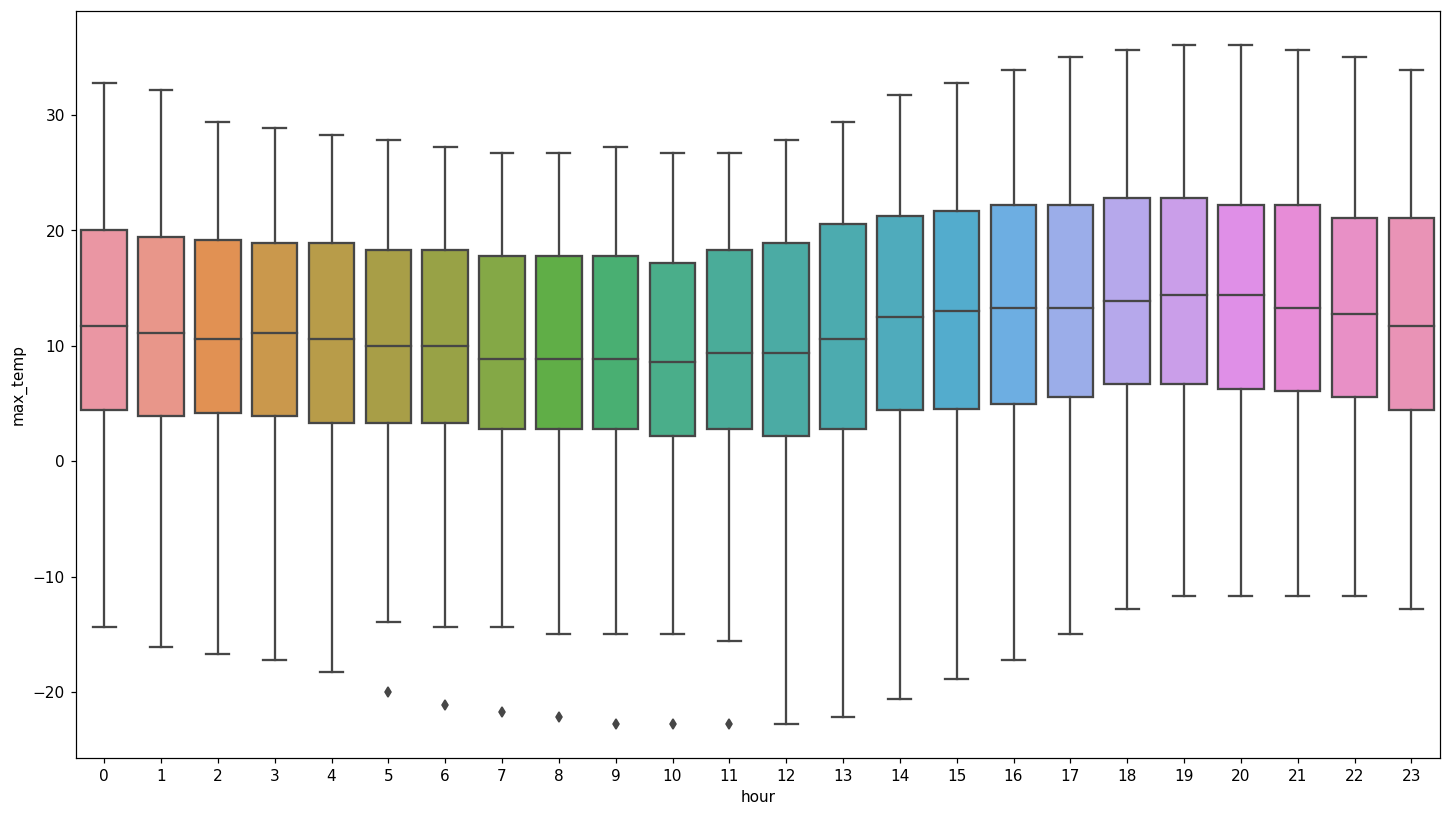

In [36]:
### dayly max temp
weather16_temp = weather2016.groupby(["date", "hour"])["max_temp"].max()
weather16_temp = pd.DataFrame(weather16_temp)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=weather16_temp.index.get_level_values(1), y=weather16_temp["max_temp"],ax=ax)
plt.show()